In [1]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
df = pd.read_csv('./data/airsim_rec.txt', sep='\t')
df = df[['POS_X', 'POS_Y']]
max_x = df['POS_X'].max()
min_x = df['POS_X'].min()
max_y = df['POS_Y'].max()
min_y = df['POS_Y'].min()
x = np.reshape(np.array(df['POS_X'].values, dtype=np.float32), (-1, 1))
y = np.reshape(np.array(df['POS_Y'].values, dtype=np.float32), (-1, 1))
x = (x - min_x) / (max_x - min_x)
y = (y - min_y) / (max_y - min_y)

In [3]:
model = keras.Sequential([
    Dense(units=1024, activation='relu'),
    Dense(units=512, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.build(input_shape=(None, 1))

In [4]:
model.fit(x, y, epochs=100)

Epoch 1/100
233/233 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 2/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 3/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 4/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 5/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 10/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12/100
233/233 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 13/100


233/233 [==============================] - 0s 2ms/step - loss: 6.1980e-04
Epoch 97/100
233/233 [==============================] - 0s 2ms/step - loss: 5.7204e-04
Epoch 98/100
233/233 [==============================] - 0s 2ms/step - loss: 5.6252e-04
Epoch 99/100
233/233 [==============================] - 0s 2ms/step - loss: 5.9637e-04
Epoch 100/100
233/233 [==============================] - 0s 2ms/step - loss: 6.0897e-04


In [28]:
predict = model.predict(x)

233/233 [==============================] - 0s 639us/step


In [29]:
predict = predict * (max_y - min_y) + min_y

In [30]:
predict

array([[-3.9318848],
       [-3.4993896],
       [-3.0277405],
       ...,
       [-8.669586 ],
       [-8.119751 ],
       [-7.632782 ]], dtype=float32)

In [32]:
predict = model.predict([10])

1/1 [==============================] - 0s 40ms/step


In [33]:
predict

array([[2.4291446]], dtype=float32)

In [ ]:
y

In [8]:
df['POS_Y']

0      -3.50923
1      -3.34110
2      -3.15988
3      -2.98265
4      -2.82426
         ...   
7448   -6.94489
7449   -6.59464
7450   -6.24611
7451   -5.88990
7452   -5.56084
Name: POS_Y, Length: 7453, dtype: float64

In [9]:
model.save_weights('./regression_model_2023_02_14.h5')

In [34]:
import matplotlib.pyplot as plt

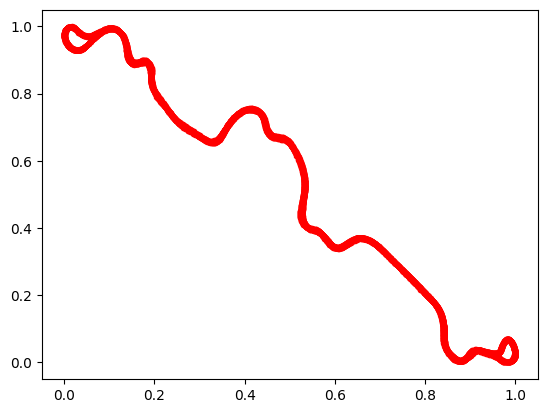

In [35]:
plt.plot(x,y,'r.')
plt.show()

In [37]:
test_x = 0.8
test_x

0.8

In [38]:
test_y = 0.2
test_y

0.2

In [39]:
distance = np.sqrt(np.square(test_x - x) + np.square(test_y - y))
distance

array([[1.061624 ],
       [1.0612099],
       [1.0607643],
       ...,
       [1.064781 ],
       [1.0644845],
       [1.0642126]], dtype=float32)

In [40]:
distance.min()

0.0028586122

In [42]:
print(max_x)
print(min_x)
print(max_y)
print(min_y)

895.674
-18.1231
0.290451
-408.805
